In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ayyucedemirbas/machine_learning_algorithms/master/datasets/iris.csv")

In [2]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df['species'].unique() 

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'Species'. 
df['species']= label_encoder.fit_transform(df['species']) 

df['species'].unique()

array([0, 1, 2])

In [5]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
import numpy as np

In [7]:
def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd, test_ds_pd = split_dataset(df)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

97 examples in training, 53 examples for testing.


In [ ]:
!pip install tensorflow_decision_forests

In [9]:
import tensorflow_decision_forests as tfdf

In [10]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label="species")

/usr/local/lib/python3.7/dist-packages/tensorflow_decision_forests/keras/core.py:2036: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)


In [11]:
test_ds=tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label="species")

/usr/local/lib/python3.7/dist-packages/tensorflow_decision_forests/keras/core.py:2036: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)


In [12]:
model = tfdf.keras.RandomForestModel(num_trees=1000)
model.compile(metrics=["accuracy"])
model.fit(train_ds)

Use /tmp/tmpz66el_ah as temporary training directory
Starting reading the dataset
1/1 [==============================] - ETA: 0s
Dataset read in 0:00:04.239635
Training model
Model trained in 0:00:00.062857
Compiling model
1/1 [==============================] - 4s 4s/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [13]:
evaluation = model.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 412ms/step - loss: 0.0000e+00 - accuracy: 0.9057

loss: 0.0000
accuracy: 0.9057


In [16]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [14]:
modelGBT = tfdf.keras.GradientBoostedTreesModel(num_trees=1000)
modelGBT.compile(metrics=["accuracy"])
modelGBT.fit(train_ds)

Use /tmp/tmpoa4ameed as temporary training directory
Starting reading the dataset
1/1 [==============================] - ETA: 0s
Dataset read in 0:00:00.086892
Training model
Model trained in 0:00:05.615202
Compiling model
1/1 [==============================] - 6s 6s/step


In [15]:
evaluation = modelGBT.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 344ms/step - loss: 0.0000e+00 - accuracy: 0.9434

loss: 0.0000
accuracy: 0.9434


In [16]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=3)

In [17]:
tfdf.model_plotter.plot_model_in_colab(modelGBT, tree_idx=0, max_depth=3)

In [18]:
model.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (4):
	petal_length
	petal_width
	sepal_length
	sepal_width

No weights

Variable Importance: MEAN_MIN_DEPTH:
    1.      "__LABEL"  2.111650 ################
    2. "sepal_length"  2.078433 ###############
    3.  "sepal_width"  1.994683 ##############
    4. "petal_length"  0.815383 #
    5.  "petal_width"  0.651950 

Variable Importance: NUM_AS_ROOT:
    1.  "petal_width" 514.000000 ################
    2. "petal_length" 485.000000 ###############
    3. "sepal_length"  1.000000 

Variable Importance: NUM_NODES:
    1.  "petal_width" 1357.000000 ################
    2. "petal_length" 1133.000000 #############
    3.  "sepal_wid

In [19]:
modelGBT.summary()

Model: "gradient_boosted_trees_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (4):
	petal_length
	petal_width
	sepal_length
	sepal_width

No weights

Variable Importance: MEAN_MIN_DEPTH:
    1.      "__LABEL"  3.936971 ################
    2. "sepal_length"  2.745168 #########
    3.  "sepal_width"  2.400399 #######
    4.  "petal_width"  1.383801 #
    5. "petal_length"  1.026635 

Variable Importance: NUM_AS_ROOT:
    1. "petal_length" 969.000000 ################
    2.  "petal_width" 805.000000 #############
    3.  "sepal_width"  5.000000 

Variable Importance: NUM_NODES:
    1. "petal_length" 6432.000000 ################
    2.  "sepal_width" 4987.000000 #######
    3.  "petal_width"

In [20]:
model.make_inspector().features()

["petal_length" (1; #0),
 "petal_width" (1; #1),
 "sepal_length" (1; #2),
 "sepal_width" (1; #3)]

In [21]:
modelGBT.make_inspector().features()

["petal_length" (1; #0),
 "petal_width" (1; #1),
 "sepal_length" (1; #2),
 "sepal_width" (1; #3)]

In [22]:
model.make_inspector().variable_importances()

{'MEAN_MIN_DEPTH': [("__LABEL" (4; #4), 2.1116500000000213),
  ("sepal_length" (1; #2), 2.0784333333333547),
  ("sepal_width" (1; #3), 1.9946833333333438),
  ("petal_length" (1; #0), 0.8153833333333332),
  ("petal_width" (1; #1), 0.6519499999999995)],
 'NUM_AS_ROOT': [("petal_width" (1; #1), 514.0),
  ("petal_length" (1; #0), 485.0),
  ("sepal_length" (1; #2), 1.0)],
 'NUM_NODES': [("petal_width" (1; #1), 1357.0),
  ("petal_length" (1; #0), 1133.0),
  ("sepal_width" (1; #3), 236.0),
  ("sepal_length" (1; #2), 70.0)],
 'SUM_SCORE': [("petal_width" (1; #1), 59117.46390191093),
  ("petal_length" (1; #0), 43080.47843237687),
  ("sepal_width" (1; #3), 644.0426548346877),
  ("sepal_length" (1; #2), 253.5799322426319)]}

In [23]:
modelGBT.make_inspector().variable_importances()

{'MEAN_MIN_DEPTH': [("__LABEL" (4; #4), 3.9369706522320436),
  ("sepal_length" (1; #2), 2.7451679605137005),
  ("sepal_width" (1; #3), 2.40039886102279),
  ("petal_width" (1; #1), 1.3838012324943305),
  ("petal_length" (1; #0), 1.026635414114329)],
 'NUM_AS_ROOT': [("petal_length" (1; #0), 969.0),
  ("petal_width" (1; #1), 805.0),
  ("sepal_width" (1; #3), 5.0)],
 'NUM_NODES': [("petal_length" (1; #0), 6432.0),
  ("sepal_width" (1; #3), 4987.0),
  ("petal_width" (1; #1), 4151.0),
  ("sepal_length" (1; #2), 3695.0)],
 'SUM_SCORE': [("petal_width" (1; #1), 196.72050608654257),
  ("petal_length" (1; #0), 68.1986772323912),
  ("sepal_width" (1; #3), 19.054439264602177),
  ("sepal_length" (1; #2), 0.8018512432842737)]}

In [24]:
model.make_inspector().evaluation()

Evaluation(num_examples=97, accuracy=0.979381443298969, loss=0.04597168308490714, rmse=None, ndcg=None, aucs=None)

In [25]:
modelGBT.make_inspector().evaluation()

Evaluation(num_examples=None, accuracy=1.0, loss=2.344452695979271e-06, rmse=None, ndcg=None, aucs=None)

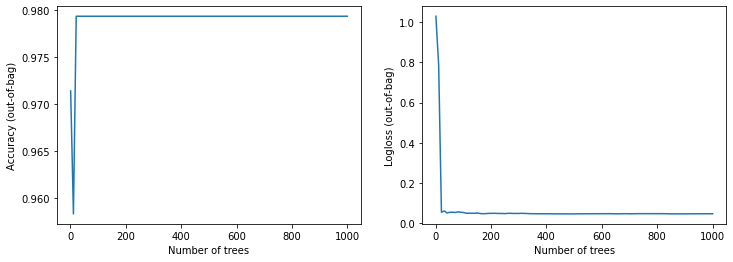

In [26]:
import matplotlib.pyplot as plt

logs = model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

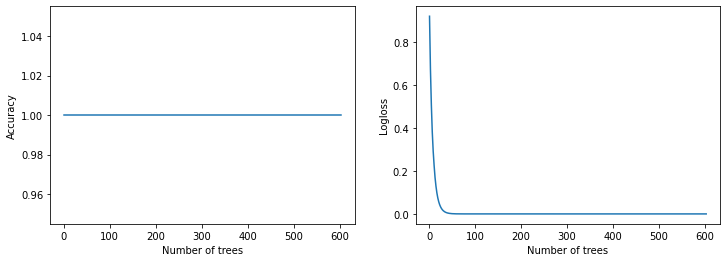

In [27]:
import matplotlib.pyplot as plt

logs = modelGBT.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss")

plt.show()

In [29]:
modelGBT_with_hyper_parameters = tfdf.keras.GradientBoostedTreesModel(num_trees=500, growing_strategy="BEST_FIRST_GLOBAL", max_depth=8)
modelGBT_with_hyper_parameters.compile(metrics=["accuracy"])
modelGBT_with_hyper_parameters.fit(train_ds)

Use /tmp/tmpx_ze3ylj as temporary training directory
Starting reading the dataset
1/1 [==============================] - ETA: 0s
Dataset read in 0:00:00.086918
Training model
Model trained in 0:00:01.922856
Compiling model
1/1 [==============================] - 2s 2s/step


In [30]:
evaluation = modelGBT_with_hyper_parameters.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 239ms/step - loss: 0.0000e+00 - accuracy: 0.9434

loss: 0.0000
accuracy: 0.9434


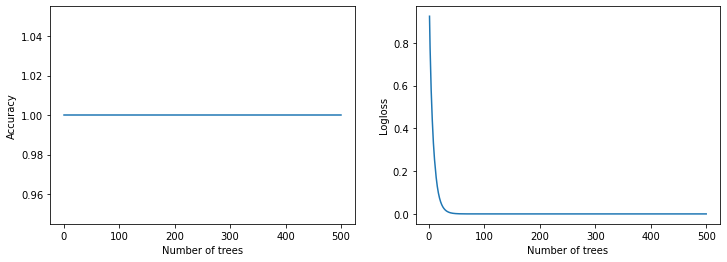

In [31]:
import matplotlib.pyplot as plt

logs = modelGBT_with_hyper_parameters.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss")

plt.show()